<a href="https://colab.research.google.com/github/Raudhil/Quiz1_MachineLearning/blob/main/KUIS1_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [ ]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [ ]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [ ]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# Data Size
df.shape

(48842, 15)

In [ ]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [ ]:
# Jawab Soal 1
# Kerjakan pada cell ini
df.isnull().sum()
# Anda diperbolehkan menambah cell jika diperlukan

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


Variabel yang memiliki nilai yang hilang ada 3, seperti gambar diatas.

## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [ ]:
# Jawab Soal 2
# Kerjakan pada cell ini
df['workclass'].fillna(value="Private", inplace=True);
df['occupation'].fillna(value="Prof-specialty", inplace=True);
df['native-country'].fillna(value="United-States", inplace=True);
# Anda diperbolehkan menambah cell jika diperlukan

/tmp/ipython-input-2781115489.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].fillna(value="Private", inplace=True);
/tmp/ipython-input-2781115489.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [ ]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

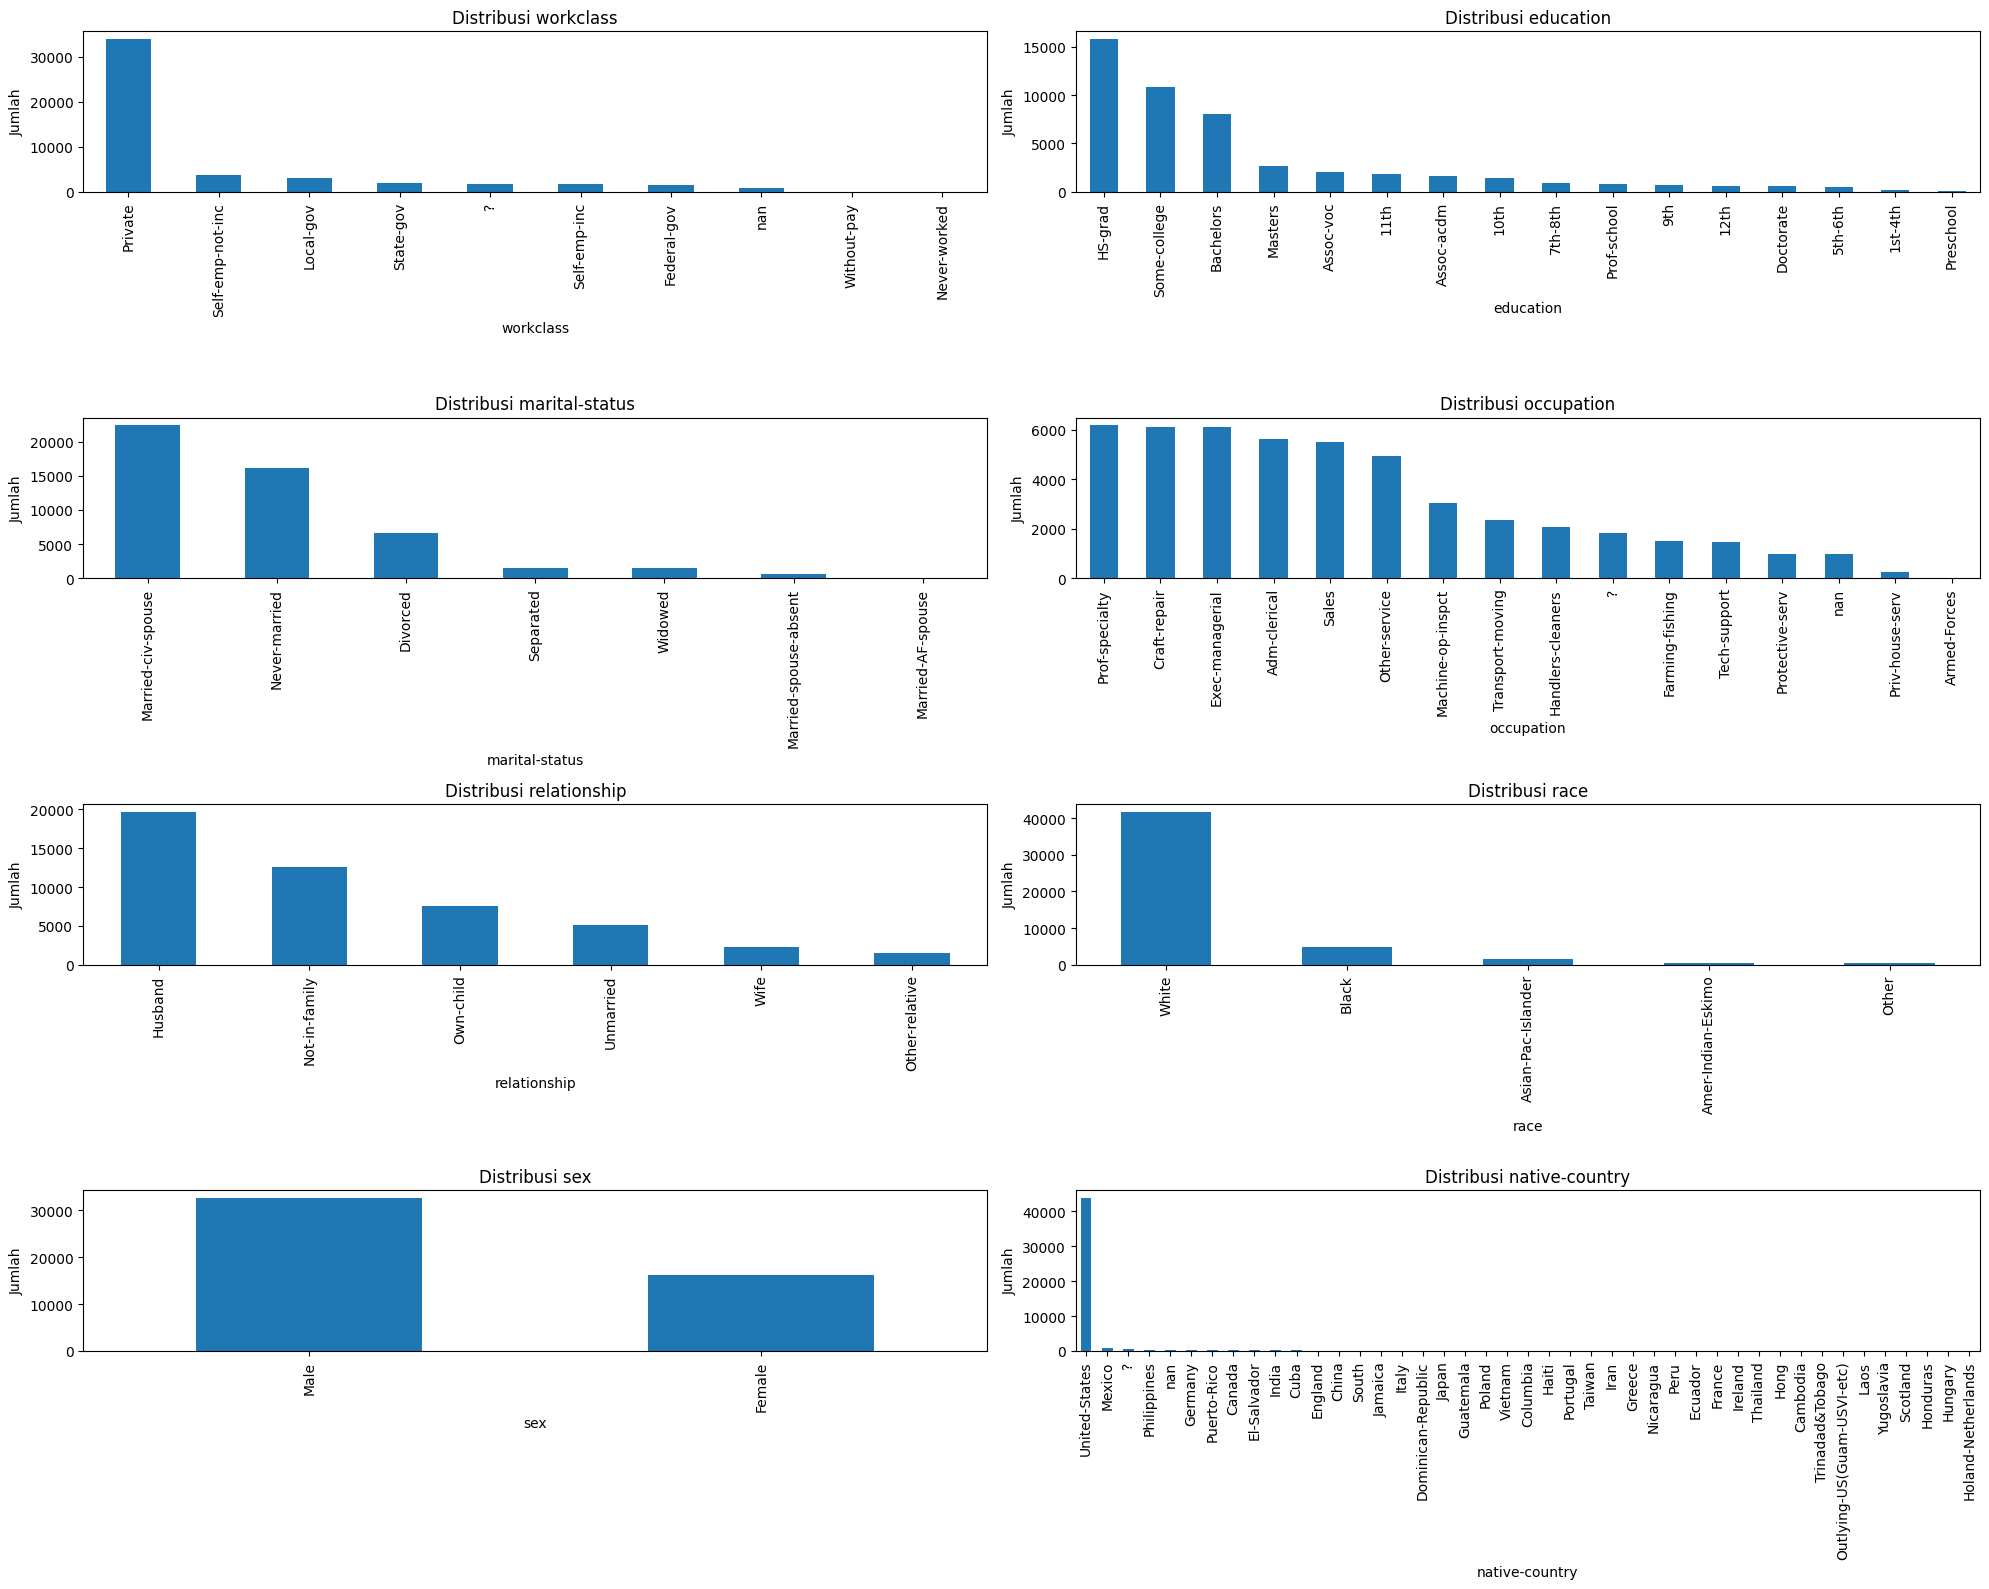

In [ ]:
# Jawab Soal 2
# Kerjakan pada cell ini
cat_cols = ['workclass', 'education','marital-status','occupation','relationship','race','sex','native-country']

fig, axes = plt.subplots(4,2,figsize=(20, 16))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    df[col].value_counts(dropna=False).plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribusi {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Jumlah')

plt.tight_layout()
plt.show()
# Anda diperbolehkan menambah cell jika diperlukan

In [65]:
df['workclass'].replace("?", value="Other", inplace=True);
df['workclass'].fillna(value="Other", inplace=True);
df['occupation'].replace("?", value="Other", inplace=True);
df['occupation'].fillna(value="Other", inplace=True);
df['native-country'].replace("?", value="Other", inplace=True);
df['native-country'].fillna(value="Other", inplace=True);

/tmp/ipython-input-2100950911.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['occupation'].replace("?", value="Other", inplace=True);
/tmp/ipython-input-2100950911.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

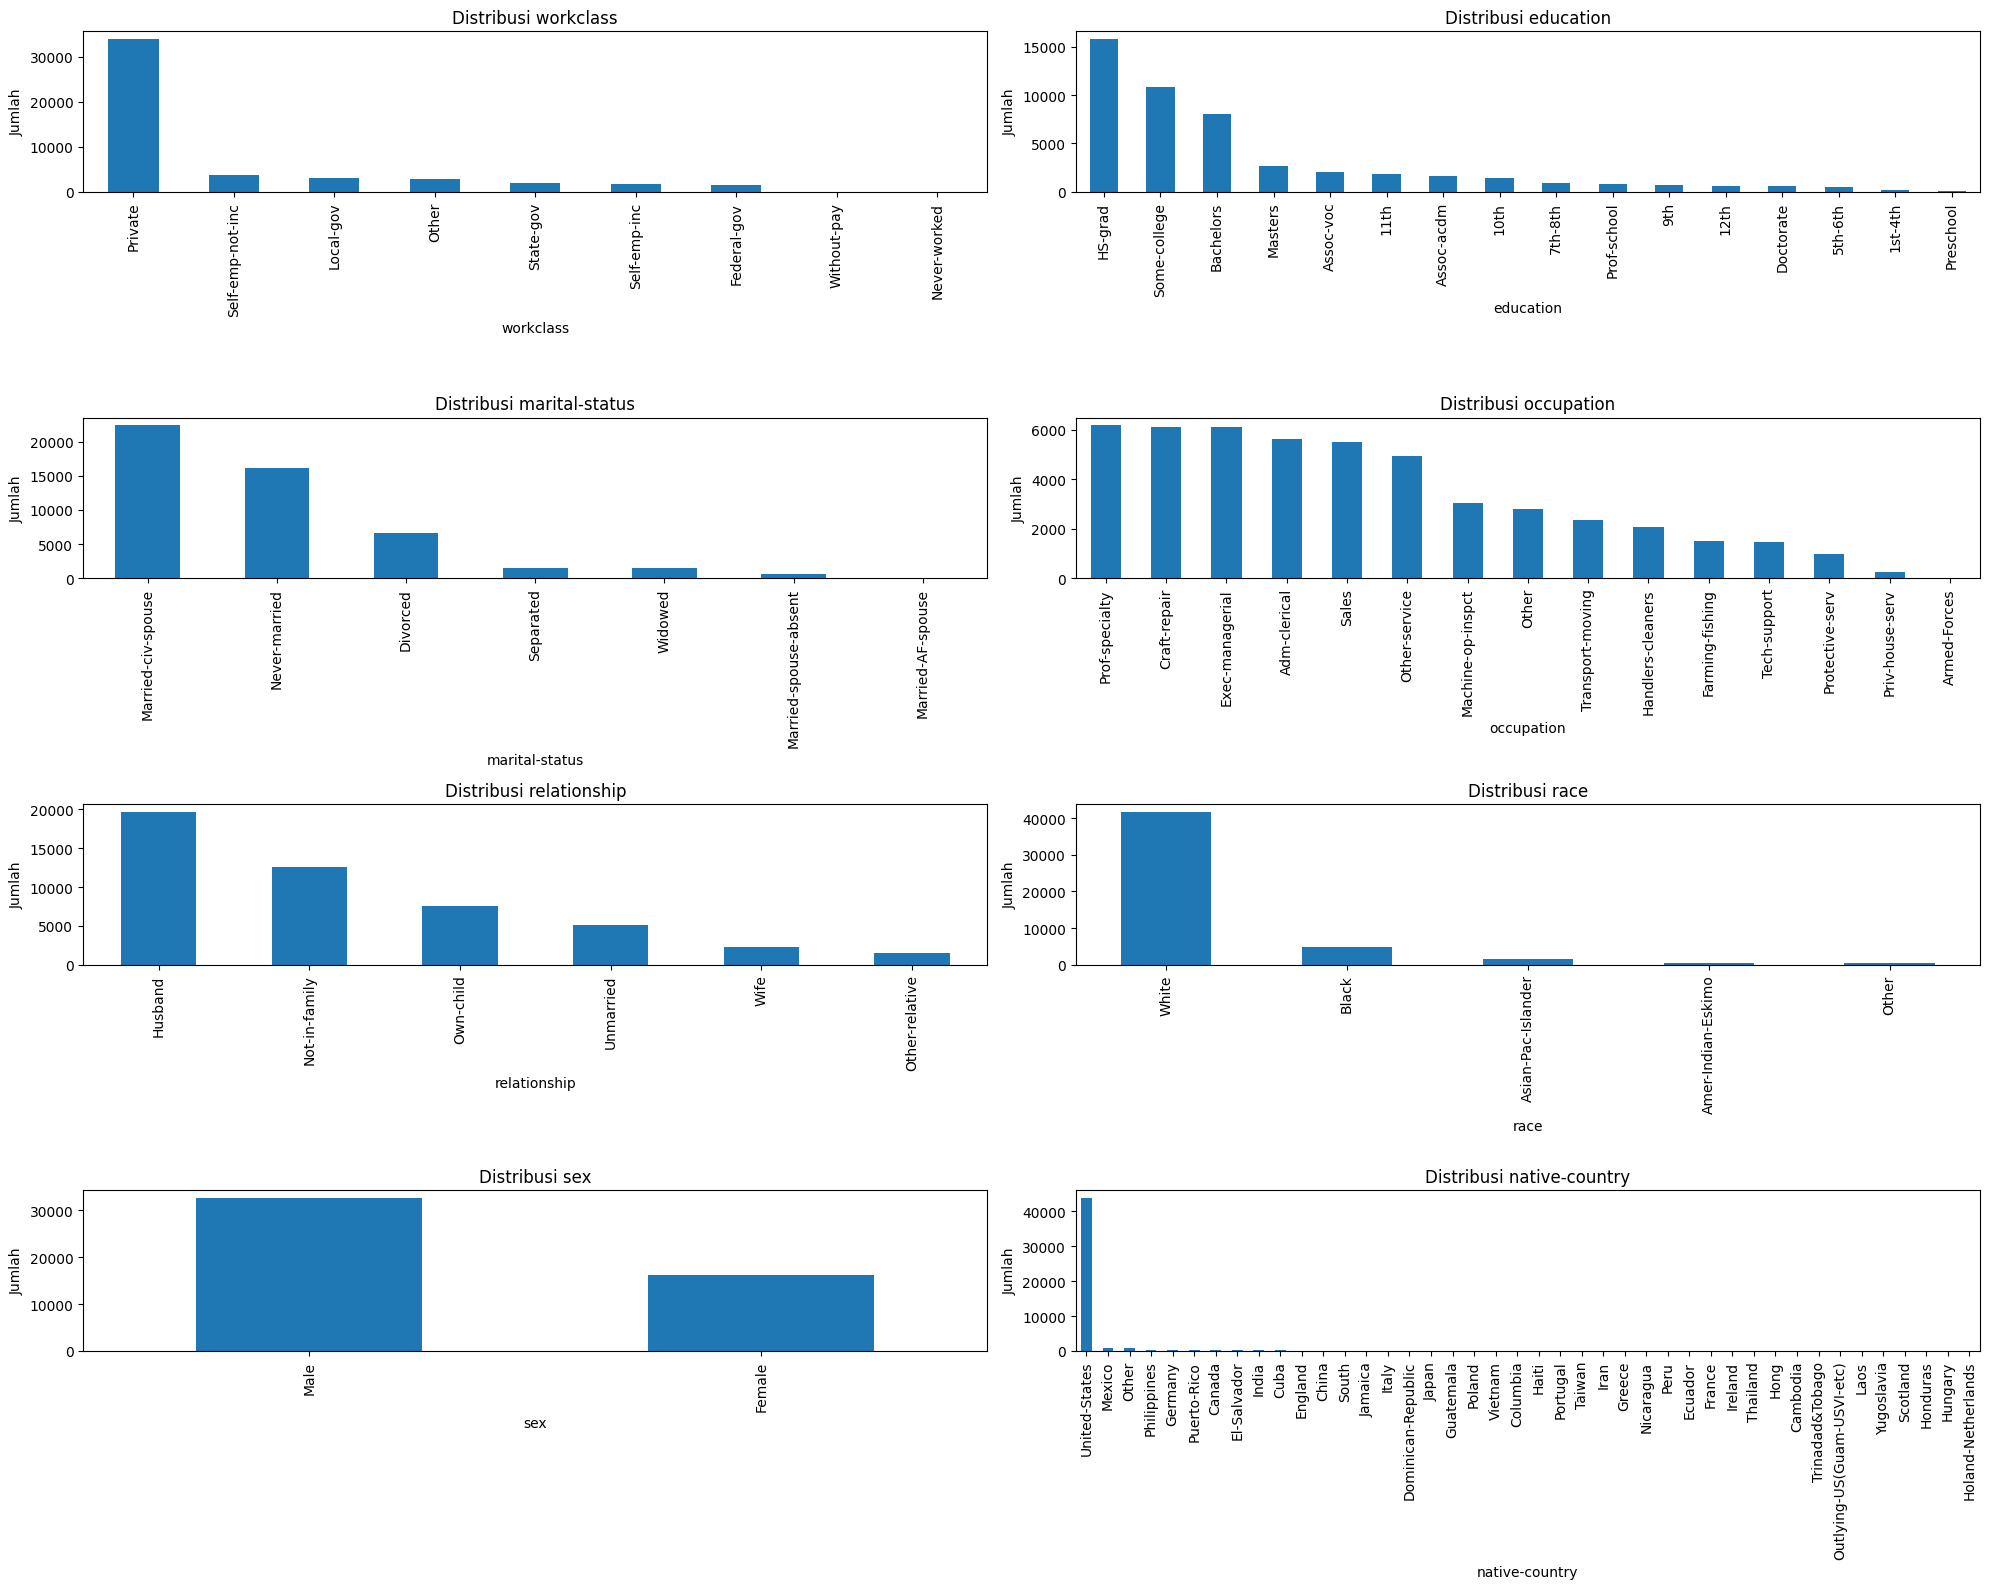

In [66]:
cat_cols = ['workclass', 'education','marital-status','occupation','relationship','race','sex','native-country']

fig, axes = plt.subplots(4,2,figsize=(20, 16))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    df[col].value_counts(dropna=False).plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribusi {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Jumlah')

plt.tight_layout()
plt.show()

Berhasil mengganti "?" dan Nan menjadi "Other"

# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

In [ ]:
# Jawab 1.1 - Histrogram

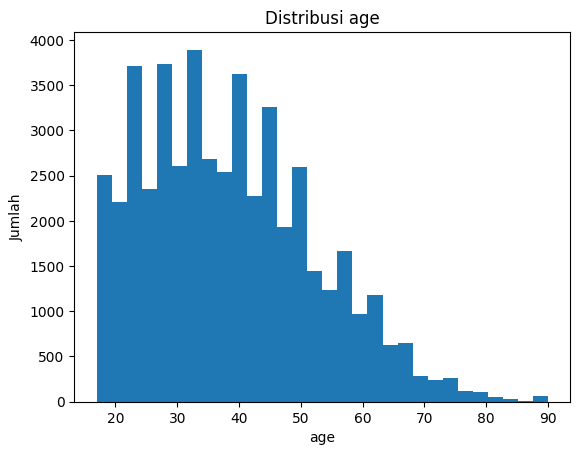

In [67]:
num_cols = ['age']
for col in num_cols:
    plt.figure()
    plt.hist(df[col], bins=30)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col); plt.ylabel('Jumlah')
    plt.show()

In [ ]:
# Jawab 1.2 - Barchart

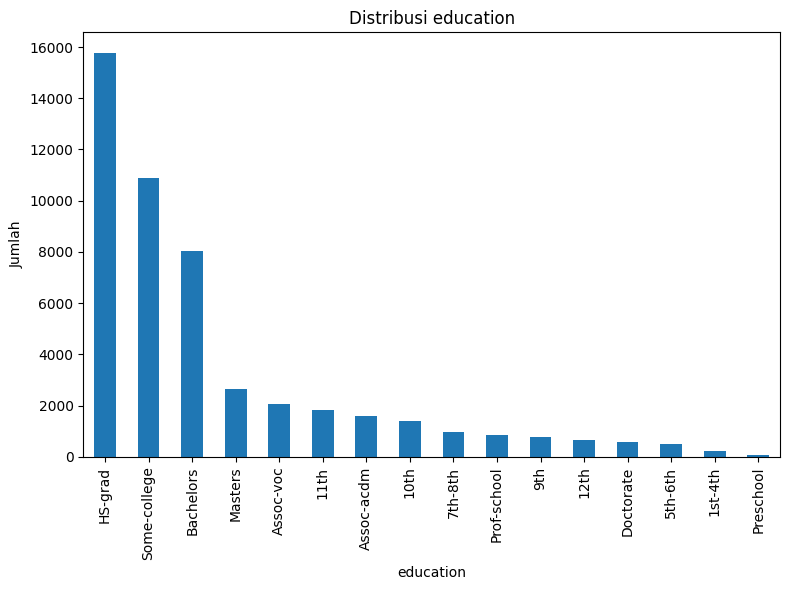

In [79]:
cat_cols = ['education']

fig, axes = plt.subplots(1,1,figsize=(8, 6))

for i, col in enumerate(cat_cols):
    df[col].value_counts(dropna=False).plot(kind='bar')
    axes.set_title(f'Distribusi {col}')
    axes.set_xlabel(col)
    axes.set_ylabel('Jumlah')

plt.tight_layout()
plt.show()

In [ ]:
# Jawab 1.3 - Boxplot

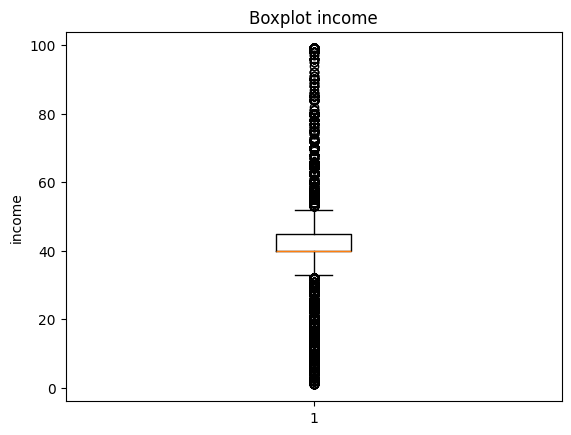

In [69]:
plt.figure()
plt.boxplot(df['hours-per-week'].dropna(), vert=True)
plt.title('Boxplot income')
plt.ylabel('income')
plt.show()

In [ ]:
# Jawab 1.4 - Lineplot

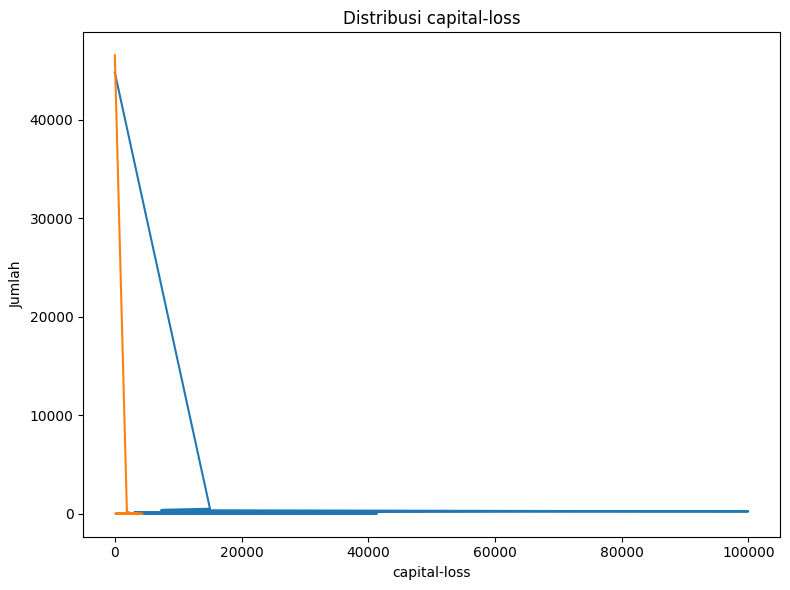

In [82]:
cat_cols = ['age']
num_cols = ['capital-gain', 'capital-loss']

fig, axes = plt.subplots(1,1,figsize=(8, 6))

for i, col in enumerate(num_cols):
    df[col].value_counts(dropna=False).plot(kind='line')
    axes.set_title(f'Distribusi {col}')
    axes.set_xlabel(col)
    axes.set_ylabel('Jumlah')

plt.tight_layout()
plt.show()


## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [89]:
# Jawab dengan komentar python


'''

1. Yang terjadi pada distribusi data 'age' adalah, data terdistribusi dengan baik, dan juga data menunjukkan kalau semakin tinggi umur, semakin sedikit jumlah orangnya, yang berarti data itu menurun.

2. Jika terdapat data yang hilang pada variabel 'age', strategi yang saya terapkan adalah membuat age mereka yang kosong menjadi rata-rata age. Tujuannya agar data tidak asal-asalan, sehingga mengambil dari rata-rata age.

3. Jumlah outlier pada setiap kategori income sangat banyak, dan yang paling banyak memiliki outlier adalah yang diatas rata-rata.
'''

"\n\n1. Yang terjadi pada distribusi data 'age' adalah, data terdistribusi dengan baik, dan juga data menunjukkan kalau semakin tinggi umur, semakin sedikit jumlah orangnya, yang berarti data itu menurun.\n\n2. Jika terdapat data yang hilang pada variabel 'age', strategi yang saya terapkan adalah membuat age mereka yang kosong menjadi rata-rata age. Tujuannya agar data tidak asal-asalan, sehingga mengambil dari rata-rata age.\n\n3. Jumlah outlier pada setiap kategori income sangat banyak, dan yang paling banyak memiliki outlier adalah yang diatas rata-rata.\n"

# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [90]:
# Jawab Soal 1
# Kerjakan pada cell ini
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Anda diperbolehkan menambah cell jika diperlukan

In [91]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['income'] = le.fit_transform(df['income'])

In [92]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

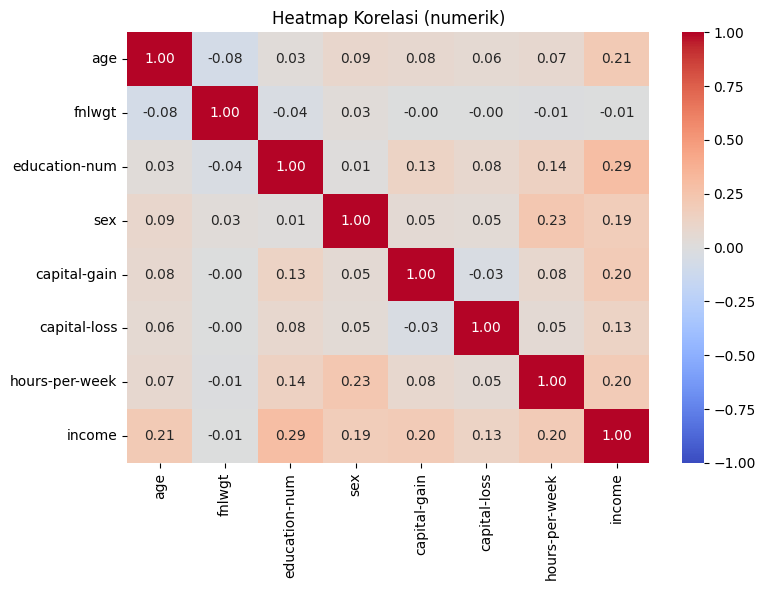

In [93]:
# Jawab Soal 1
# Kerjakan pada cell ini
import seaborn as sns

num_only = df.select_dtypes(include=[np.number])
corr = num_only.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, annot=True, fmt=".2f")
plt.title('Heatmap Korelasi (numerik)')
plt.tight_layout()
plt.show()
# Anda diperbolehkan menambah cell jika diperlukan

In [94]:
# Hasil analisis jelaskan pada cell ini
'''
Berdasarkan analisis saya dari heatmap diatas, hal yang paling berpengaruh dari income, adalah education-num, diikuti dengan age, hours-per-week dan capital-gain, sex, capital-loss.
'''

'\nBerdasarkan analisis saya dari heatmap diatas, hal yang paling berpengaruh dari income, adalah education-num, diikuti dengan age, hours-per-week dan capital-gain, sex, capital-loss.\n'

# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [95]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


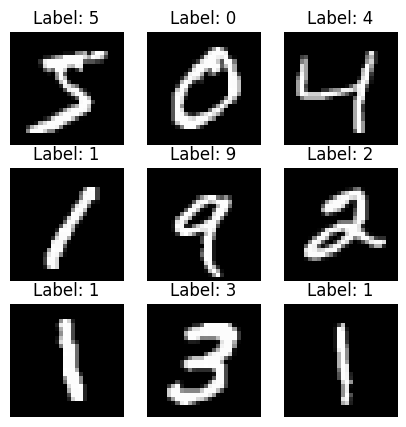

In [102]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

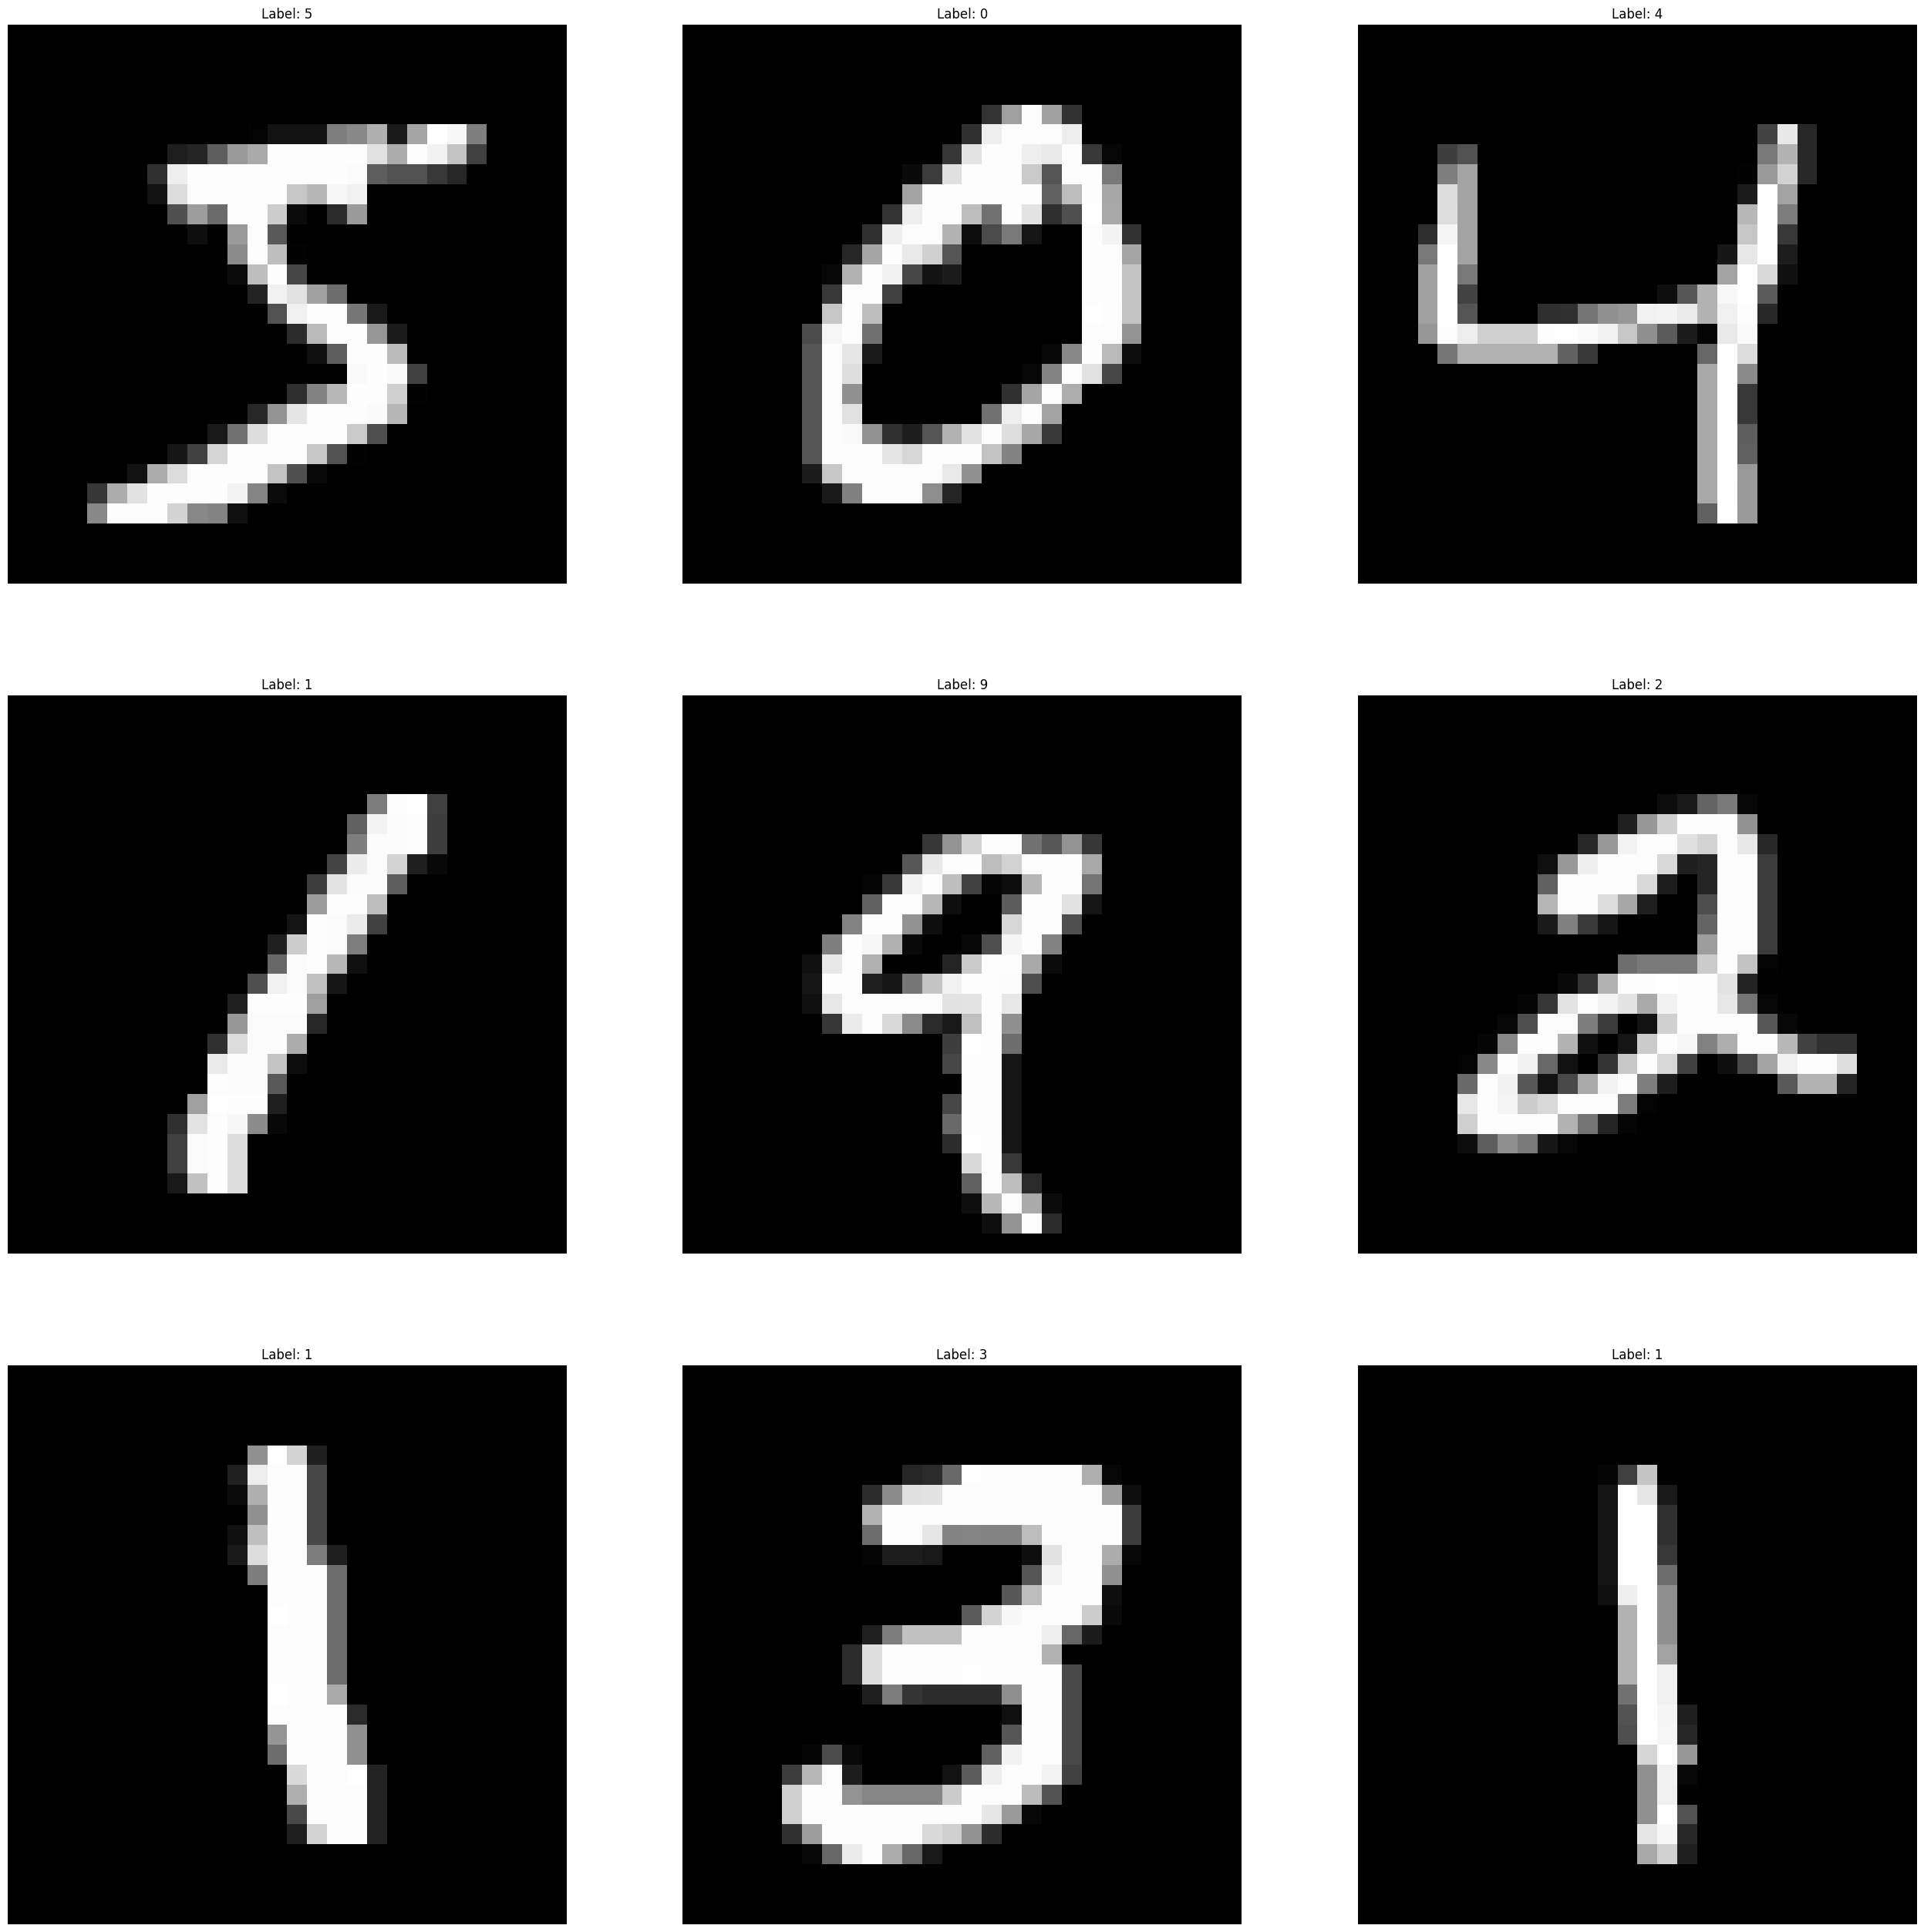

In [103]:
# Jawab Soal 1
# Kerjakan pada cell ini
plt.figure(figsize=(32,32))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()
# Anda diperbolehkan menambah cell jika diperlukan

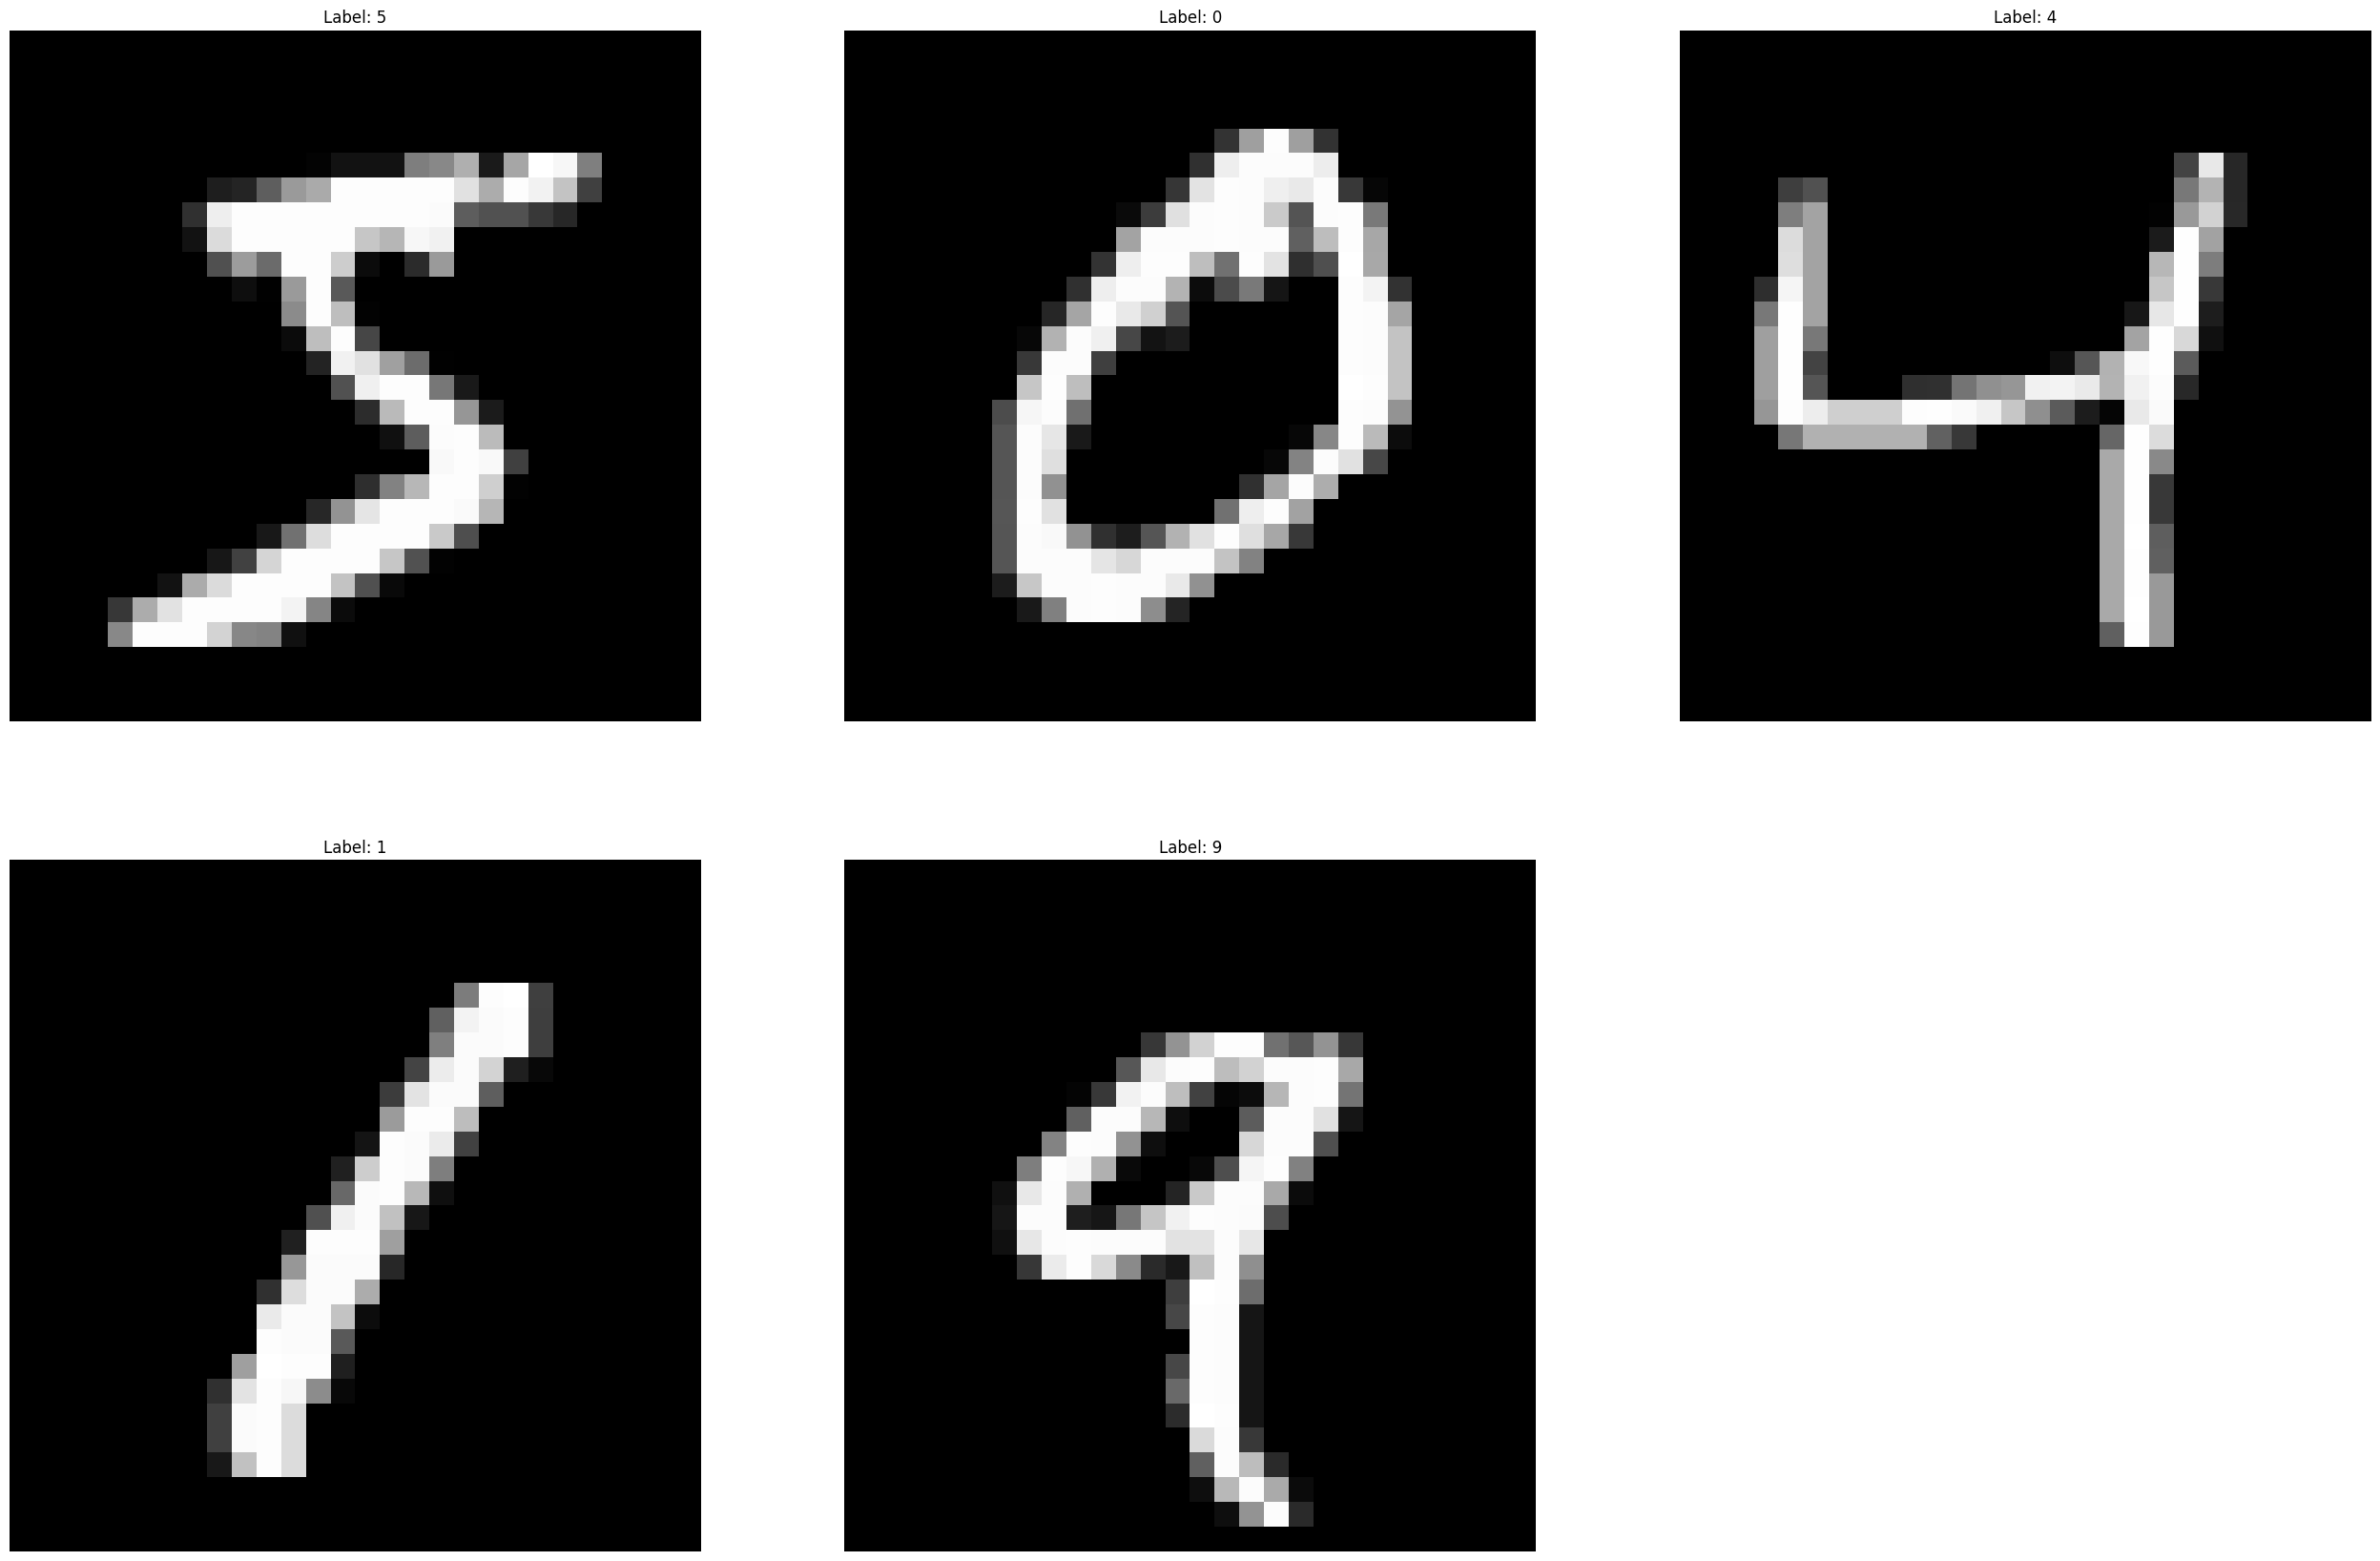

In [105]:
plt.figure(figsize=(32,32))
for i in range(5):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

In [110]:
# Jawab Soal 2
# Kerjakan pada cell ini

(X_train, y_train), (X_test, y_test) = mnist.load_data()\

std = StandardScaler()
X_train = std.fit_transform( X_train.reshape(60000, 784))
X_test = std.fit_transform(X_test.reshape(10000,784))

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
# Anda diperbolehkan menambah cell jika diperlukan

Train shape: (60000, 784)
Test shape: (10000, 784)


## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [111]:
# Jawab Soal 3
# Kerjakan pada cell ini
X_test = X_test.reshape(10000, 784)
print("Test shape:", X_test.shape)
# Anda diperbolehkan menambah cell jika diperlukan

Test shape: (10000, 784)
